Let's draw a straight line passing through two random points. 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate two random points (x1, y1) and (x2, y2) within the range -10 to 10
x1, y1 = random.uniform(-10, 10), random.uniform(-10, 10)
x2, y2 = random.uniform(-10, 10), random.uniform(-10, 10)

# Print the points
print(f"Point 1: ({x1}, {y1})")
print(f"Point 2: ({x2}, {y2})")

# Calculate the slope (m) and y-intercept (b) using the normal equation
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Print the line equation
print(f"Equation of the line: y = {m}x + {b}")

# Generate x values for plotting the line
x_vals = np.linspace(-10, 10, 100)
y_vals = m * x_vals + b

# Plot the points and the line
plt.plot(x_vals, y_vals, label=f"y = {m:.2f}x + {b:.2f}", color='blue')  # Line
plt.scatter([x1, x2], [y1, y2], color='red', zorder=5)  # Points
plt.text(x1, y1, f"({x1:.2f}, {y1:.2f})", fontsize=12, ha='right')
plt.text(x2, y2, f"({x2:.2f}, {y2:.2f})", fontsize=12, ha='left')

# Add labels and title
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title("Randomly Generated Points and Fitted Line")

# Show the plot
plt.show()


Let's fit a straight line (linear regression) through multiple points.
The matrix inversion is done through Gauss-Jordan. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two random (x, y) points along a straight line to create an example 
# Define the line equation parameters
m = 2  # slope
c = 5  # y-intercept

# Generate 20 random x values within the range -10 to 10
x = np.random.uniform(-10, 10, 20)

# Generate y values along the line with some random noise added
noise = np.random.normal(0, 2, x.shape)  # adding Gaussian noise with mean 0 and std deviation 2
y = m * x + c + noise


# Calculate the necessary sums for Least Square Matrix
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x ** 2)
sum_xy = np.sum(x * y)

# Construct the normal equation matrices
A = np.array([[n, sum_x], [sum_x, sum_x2]])
b = np.array([sum_y, sum_xy])

# Function to perform Gauss-Jordan elimination
def gauss_jordan(A):
    n = len(A)
    augmented_matrix = np.hstack((A, np.eye(n)))
    
    for i in range(n):
        # Make the diagonal element 1
        factor = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / factor
        
        # Make the other elements in column i 0
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]
    
    return augmented_matrix[:, n:]

# Calculate the inverse using Gauss-Jordan elimination
inv_A = gauss_jordan(A)

# Solve for the coefficients
theta = np.dot(inv_A, b)

# Generate a range of x values for the line plot
x_line = np.linspace(-10, 10, 100)
y_line = theta[0] + theta[1] * x_line

# Plot the points and the line
plt.scatter(x, y, color='red', label='Random Points')
plt.plot(x_line, y_line, color='blue', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Points and Fitted Line')
plt.legend()
plt.grid(True)
plt.show()


Let's try overfitting a high-order polynomial on the given points.
The 'fit_polynomial' function is generating the Least Square Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(m, c, num_points, noise_std=2):
    """Generates random points along a line with Gaussian noise."""
    x = np.random.uniform(-10, 10, num_points)
    noise = np.random.normal(0, noise_std, x.shape)
    y = m * x + c + noise
    return x, y

def fit_polynomial(x, y, degree):
    """Fits a polynomial of given degree to the points (x, y) using least squares."""
    n = len(x)
    X = np.vstack([x**i for i in range(degree + 1)]).T
    
    # Construct the matrix for least squares fitting
    A = np.zeros((degree + 1, degree + 1))
    b = np.zeros(degree + 1)
    
    for i in range(degree + 1):
        for j in range(degree + 1):
            A[i, j] = np.sum(x**(i + j))
        b[i] = np.sum(y * x**i)
    
    # Perform Gauss-Jordan elimination to find the inverse of A
    def gauss_jordan(A):
        n = len(A)
        augmented_matrix = np.hstack((A, np.eye(n)))
        for i in range(n):
            factor = augmented_matrix[i, i]
            augmented_matrix[i] = augmented_matrix[i] / factor
            for j in range(n):
                if i != j:
                    factor = augmented_matrix[j, i]
                    augmented_matrix[j] -= factor * augmented_matrix[i]
        return augmented_matrix[:, n:]

    inv_A = gauss_jordan(A)
    coefficients = np.dot(inv_A, b)
    return coefficients

def plot_points_and_curve(x, y, coefficients):
    """Plots the random points and the fitted polynomial curve."""
    x_line = np.linspace(-10, 10, 100)
    y_line = sum(coefficients[i] * x_line**i for i in range(len(coefficients)))
    
    plt.scatter(x, y, color='red', label='Random Points')
    plt.plot(x_line, y_line, color='blue', label='Fitted Polynomial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Points and Fitted Polynomial Curve')
    plt.legend()
    plt.grid(True)
    plt.xlim(-30, 30)  # Set x-axis limits
    plt.ylim(-30, 30)  # Set y-axis limits
    plt.show()

# Example usage
m = 2
c = 5
num_points = 8
degree = 1

x, y = generate_points(m, c, num_points)
coefficients = fit_polynomial(x, y, degree)
plot_points_and_curve(x, y, coefficients)


Let's implement a basic Gradient Descent Algorithm for comparison with analytical solution

Normal Equation Coefficients: [4.9312387  2.19494336]
Gradient Descent Coefficients: [4.83410324 2.20062529]


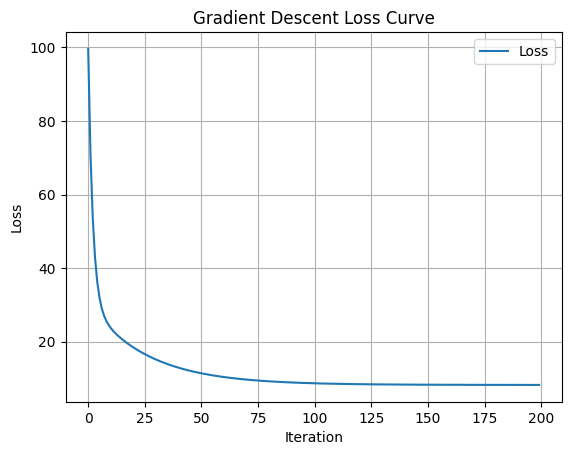

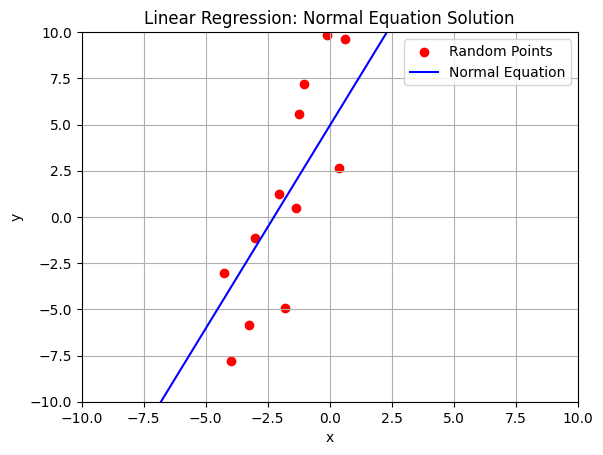

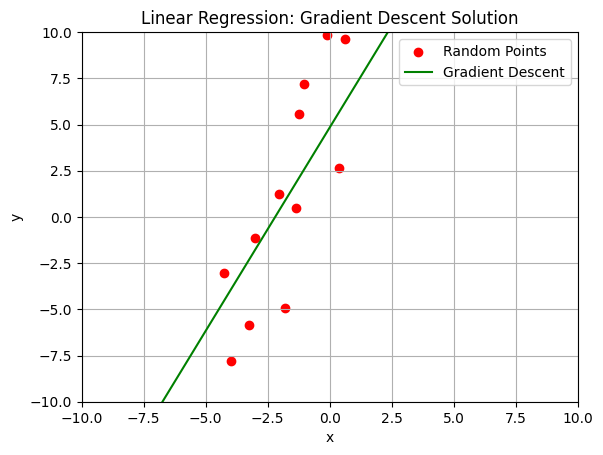

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(m, c, num_points, noise_std=2):
    """Generates random points along a line with Gaussian noise."""
    x = np.random.uniform(-10, 10, num_points)
    noise = np.random.normal(0, noise_std, x.shape)
    y = m * x + c + noise
    return x, y

def fit_polynomial(x, y, degree):
    """Fits a polynomial of given degree to the points (x, y) using least squares."""
    n = len(x)
    X = np.vstack([x**i for i in range(degree + 1)]).T
    
    # Construct the matrix for least squares fitting
    A = np.zeros((degree + 1, degree + 1))
    b = np.zeros(degree + 1)
    
    for i in range(degree + 1):
        for j in range(degree + 1):
            A[i, j] = np.sum(x**(i + j))
        b[i] = np.sum(y * x**i)
    
    # Perform Gauss-Jordan elimination to find the inverse of A
    def gauss_jordan(A):
        n = len(A)
        augmented_matrix = np.hstack((A, np.eye(n)))
        for i in range(n):
            factor = augmented_matrix[i, i]
            augmented_matrix[i] = augmented_matrix[i] / factor
            for j in range(n):
                if i != j:
                    factor = augmented_matrix[j, i]
                    augmented_matrix[j] -= factor * augmented_matrix[i]
        return augmented_matrix[:, n:]

    inv_A = gauss_jordan(A)
    coefficients = np.dot(inv_A, b)
    return coefficients

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    """Performs gradient descent to fit a linear regression model."""
    n = len(x)
    theta = np.zeros(2)
    X = np.vstack((np.ones(n), x)).T
    y = y.reshape(-1, 1)
    
    loss_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta).reshape(-1, 1)
        errors = predictions - y
        gradient = (2 / n) * np.dot(X.T, errors)
        theta -= learning_rate * gradient.flatten()
        
        # Compute and store the loss
        loss = (1 / n) * np.sum(errors ** 2)
        loss_history.append(loss)
    
    return theta, loss_history

def plot_points_and_curves(x, y, normal_eq_coeff, gd_coeff):
    """Plots the random points and the fitted linear curves in separate figures."""
    x_line = np.linspace(-10, 10, 100)
    y_normal_eq = normal_eq_coeff[0] + normal_eq_coeff[1] * x_line
    y_gd = gd_coeff[0] + gd_coeff[1] * x_line
    
    # Plot the normal equation solution
    plt.figure()
    plt.scatter(x, y, color='red', label='Random Points')
    plt.plot(x_line, y_normal_eq, color='blue', label='Normal Equation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression: Normal Equation Solution')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()
    
    # Plot the gradient descent solution
    plt.figure()
    plt.scatter(x, y, color='red', label='Random Points')
    plt.plot(x_line, y_gd, color='green', label='Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression: Gradient Descent Solution')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

def plot_loss_curve(loss_history):
    """Plots the loss curve for gradient descent."""
    plt.figure()
    plt.plot(loss_history, label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Gradient Descent Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
m = 2
c = 5
num_points = 20

x, y = generate_points(m, c, num_points)
normal_eq_coeff = fit_polynomial(x, y, degree=1)

learning_rate=0.01
iterations=200

gd_coeff, loss_history = gradient_descent(x, y, learning_rate, iterations)

print("Normal Equation Coefficients:", normal_eq_coeff)
print("Gradient Descent Coefficients:", gd_coeff)

plot_loss_curve(loss_history)
plot_points_and_curves(x, y, normal_eq_coeff, gd_coeff)

